Process Data:

In [3]:
import math

# use math.dist() to find distances between points 
# store using dictionary adjacency list --> get complete graph
# filter out to get new graph again
# apply dijkstra's to get short path

# getting the points. it's in order from a-w
all_coordinates = [
    [0,0],
    [1.6, 0.6],
    [1, 1],
    [0.8, 1.8],
    [1, 2.2],
    [0, 3.4],
    [2.2, 3.4],
    [2.2, 4.6],
    [0.6, 5.2],
    [-1.2, 4.6],
    [0, 5.8],
    [-1.6, 6.4],
    [2.2, 6.8],
    [1.6, 7.4],
    [0, 8],
    [0, 9],
    [-1.6, 9.6],
    [0, 11],
    [0, 12.2],
    [2.2, 13.2],
    [1.2, 14.2],
    [1.6, 14.6],
    [-0.4, 15.6]
]
edge_weights = {}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_list = []
    for j in range(i+1, len(all_coordinates)):
        edge_list.append(math.dist(all_coordinates[i],all_coordinates[j]))
    edge_weights[i] = edge_list
        # outer loop index inner loop = math.dist([first point], [second point])

print(edge_weights)
print(len(edge_weights[0]))

{0: [1.7088007490635062, 1.4142135623730951, 1.969771560359221, 2.4166091947189146, 3.4, 4.049691346263318, 5.0990195135927845, 5.2345009313209605, 4.7539457296018846, 5.8, 6.596969000988257, 7.147027354082255, 7.57099729229908, 8.0, 9.0, 9.73242004847715, 11.0, 12.2, 13.382077566656083, 14.250614021858848, 14.687409574189724, 15.605127362504927], 1: [0.7211102550927979, 1.4422205101855958, 1.7088007490635064, 3.2249030993194197, 2.8635642126552705, 4.044749683231337, 4.707440918375928, 4.88262224629348, 5.440588203494178, 6.6241980646716785, 6.2289646009589745, 6.800000000000001, 7.57099729229908, 8.55102333057278, 9.551963149007642, 10.522357150372725, 11.709824934643557, 12.614277624977182, 13.605881081355959, 14.0, 15.132745950421556], 2: [0.8246211251235321, 1.2000000000000002, 2.6, 2.6832815729997477, 3.794733192202055, 4.219004621945797, 4.219004621945797, 4.903060268852505, 5.993329625508679, 5.922837157984339, 6.428063471995279, 7.0710678118654755, 8.06225774829855, 8.98443097

Getting Complete Graph 

(Note: adjusted above code to get a dictionary with alphabet letters as keys, and for values a dictionary of the edge weights instead of a list)

In [4]:
import string
# getting our used letters
letters = string.ascii_uppercase
nodes_list = letters[:23]

print(nodes_list)

ABCDEFGHIJKLMNOPQRSTUVW


In [5]:
complete_graph = {} # overall dictionary ex. {"A": {"B":3, "C":4}}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_weights_dict = {} # inner dictionary of edge weights to other nodes (ex. "A": 2) 
    for j in range(i+1, len(all_coordinates)):
        if i != j:
            # Calculate distance and store in both directions
            distance = math.dist(all_coordinates[i], all_coordinates[j])
            edge_weights_dict[nodes_list[j]] = distance # store edge to j with weights
    complete_graph[nodes_list[i]] = edge_weights_dict
        # outer loop index inner loop = math.dist([first point], [second point])

print(complete_graph)
print(complete_graph["A"])



{'A': {'B': 1.7088007490635062, 'C': 1.4142135623730951, 'D': 1.969771560359221, 'E': 2.4166091947189146, 'F': 3.4, 'G': 4.049691346263318, 'H': 5.0990195135927845, 'I': 5.2345009313209605, 'J': 4.7539457296018846, 'K': 5.8, 'L': 6.596969000988257, 'M': 7.147027354082255, 'N': 7.57099729229908, 'O': 8.0, 'P': 9.0, 'Q': 9.73242004847715, 'R': 11.0, 'S': 12.2, 'T': 13.382077566656083, 'U': 14.250614021858848, 'V': 14.687409574189724, 'W': 15.605127362504927}, 'B': {'C': 0.7211102550927979, 'D': 1.4422205101855958, 'E': 1.7088007490635064, 'F': 3.2249030993194197, 'G': 2.8635642126552705, 'H': 4.044749683231337, 'I': 4.707440918375928, 'J': 4.88262224629348, 'K': 5.440588203494178, 'L': 6.6241980646716785, 'M': 6.2289646009589745, 'N': 6.800000000000001, 'O': 7.57099729229908, 'P': 8.55102333057278, 'Q': 9.551963149007642, 'R': 10.522357150372725, 'S': 11.709824934643557, 'T': 12.614277624977182, 'U': 13.605881081355959, 'V': 14.0, 'W': 15.132745950421556}, 'C': {'D': 0.8246211251235321, 

Filtering graph 

Computing threshold

Hand: 18 cm wide
Arm: 56 cm (shoulder to tip of hand)
A to B is 36 cm 
Convert 36 cm to 1.6 —> aka 22.5 : 1 ratio
Threshold of 56 cm to our metric —> 2.48 threshold

2.5 ft threshold

In [6]:
# getting filtered graph, same as complete but added check
filtered_graph = {} # overall dictionary ex. {"A": {"B":3, "C":4}}
# finding edge weights between all points. will be stored in a list (index is starting vertex) of lists (index is ending vertex)
for i in range(len(all_coordinates)):
    edge_weights_dict = {} # inner dictionary of edge weights to other nodes (ex. "A": 2) 
    for j in range(i+1, len(all_coordinates)):
        if i != j:
            # Calculate distance and store in both directions
            distance = math.dist(all_coordinates[i], all_coordinates[j])
            if distance < 2.5:
                edge_weights_dict[nodes_list[j]] = distance # store edge to j with weights
    filtered_graph[nodes_list[i]] = edge_weights_dict
        # outer loop index inner loop = math.dist([first point], [second point])

print(filtered_graph)
print(filtered_graph["A"])

{'A': {'B': 1.7088007490635062, 'C': 1.4142135623730951, 'D': 1.969771560359221, 'E': 2.4166091947189146}, 'B': {'C': 0.7211102550927979, 'D': 1.4422205101855958, 'E': 1.7088007490635064}, 'C': {'D': 0.8246211251235321, 'E': 1.2000000000000002}, 'D': {'E': 0.44721359549995804, 'F': 1.7888543819998317, 'G': 2.12602916254693}, 'E': {'F': 1.5620499351813306, 'G': 1.697056274847714}, 'F': {'G': 2.2, 'I': 1.8973665961010278, 'J': 1.6970562748477138, 'K': 2.4}, 'G': {'H': 1.1999999999999997, 'I': 2.4083189157584592}, 'H': {'I': 1.7088007490635064, 'M': 2.2}, 'I': {'J': 1.8973665961010275, 'K': 0.8485281374238568, 'M': 2.262741699796952, 'N': 2.4166091947189146}, 'J': {'K': 1.6970562748477143, 'L': 1.8439088914585782}, 'K': {'L': 1.7088007490635064, 'M': 2.4166091947189146, 'N': 2.2627416997969525, 'O': 2.2}, 'L': {'O': 2.262741699796952}, 'M': {'N': 0.8485281374238575}, 'N': {'O': 1.7088007490635062, 'P': 2.262741699796952}, 'O': {'P': 1.0, 'Q': 2.262741699796952}, 'P': {'Q': 1.7088007490635

Implementing Dijkstra's Algorithm

In [7]:
from heapq import heapify, heappop, heappush

class Graph:
    def __init__(self, graph: dict = {}):
       self.graph = graph  # A dictionary for the adjacency list
    
    def add_edge(self, node1, node2, weight):
        if node1 not in self.graph:  # Check if the node is already added
           self.graph[node1] = {}  # If not, create the node
        self.graph[node1][node2] = weight  # Else, add a connection to its neighbor
    
    def shortest_distances(self, source: str):
        # Initialize the values of all nodes with infinity
        distances = {node: float("inf") for node in self.graph}
        distances[source] = 0  # Set the source value to 0

        # Initialize a priority queue
        pq = [(0, source)]
        heapify(pq)

        # Create a set to hold visited nodes
        visited = set()

        while pq:  # While the priority queue isn't empty
            current_distance, current_node = heappop(pq)  # Get the node with the min distance

            if current_node in visited:
                continue  # Skip already visited nodes
            visited.add(current_node)  # Else, add the node to visited set
        
            for neighbor, weight in self.graph[current_node].items():
            # Calculate the distance from current_node to the neighbor
                tentative_distance = current_distance + weight
                if tentative_distance < distances[neighbor]:
                    distances[neighbor] = tentative_distance
                    heappush(pq, (tentative_distance, neighbor))
            
            # calculate the path 
            predecessors = {node: None for node in self.graph}
            for node, distance in distances.items():
                for neighbor, weight in self.graph[node].items():
                    if distances[neighbor] == distance + weight:
                        predecessors[neighbor] = node

        return distances, predecessors
    
    def shortest_path(self, source: str, target: str):
        # Generate the predecessors dict
        _, predecessors = self.shortest_distances(source)

        path = []
        current_node = target

        # Backtrack from the target node using predecessors, until source node reached
        while current_node:
            path.append(current_node)
            current_node = predecessors[current_node]

        # Reverse the path and return it
        path.reverse()

        return path

In [8]:
G = Graph(filtered_graph)
shortest_path_AW = G.shortest_path("A", "W")
shortest_path_HW = G.shortest_path("H", "W")
print(f'From bottom A to top W: {shortest_path_AW}')
print(f'From actual start hold H to top W: {shortest_path_HW}')


From bottom A to top W: ['A', 'D', 'F', 'K', 'O', 'P', 'R', 'S', 'U', 'W']
From actual start hold H to top W: ['H', 'M', 'N', 'P', 'R', 'S', 'U', 'W']


## RDP

In [9]:
all_coordinates_dict = {}
for node, coordinate in zip(nodes_list, all_coordinates):
    all_coordinates_dict[node] = coordinate

In [10]:
shortest_path_HW_coord = [0] * len(shortest_path_HW)
for i, node in enumerate(shortest_path_HW):
    shortest_path_HW_coord[i] = all_coordinates_dict[node]
shortest_path_HW_coord

[[2.2, 4.6],
 [2.2, 6.8],
 [1.6, 7.4],
 [0, 9],
 [0, 11],
 [0, 12.2],
 [1.2, 14.2],
 [-0.4, 15.6]]

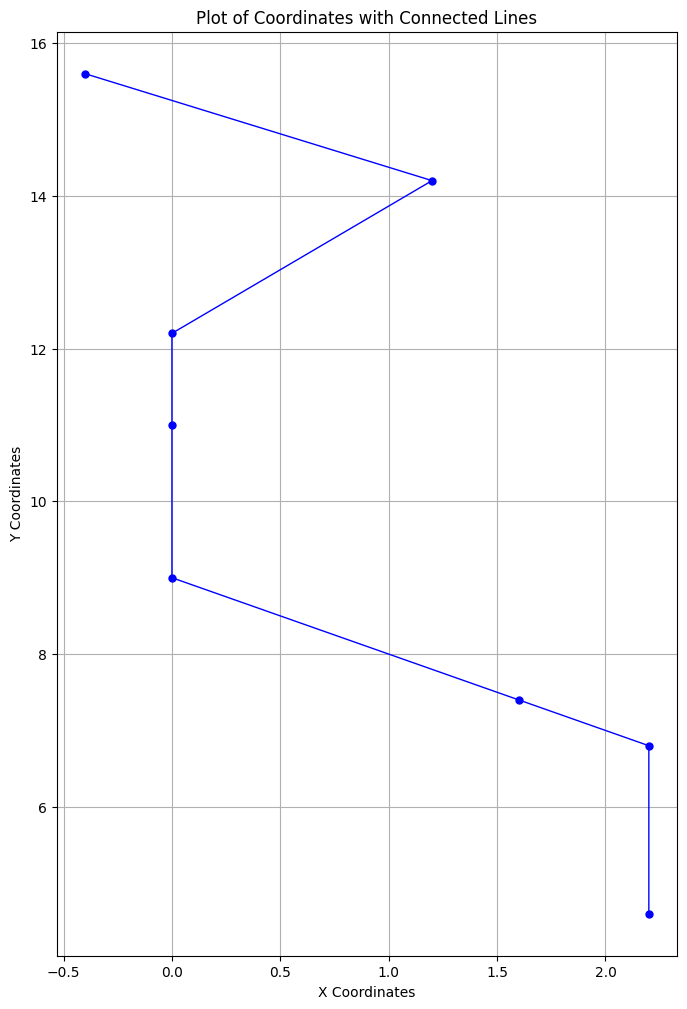

In [15]:
import matplotlib.pyplot as plt
def draw_path(coordinates): 
    # Extract x and y coordinates for plotting
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]

    # Plot the points and connect them with lines
    plt.figure(figsize=(8, 12))
    plt.plot(x_values, y_values, marker='o', color='b', linestyle='-', linewidth=1, markersize=5)

    # Label axes and show grid
    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Plot of Coordinates with Connected Lines")
    plt.grid(True)

    # Show plot
    plt.show()
draw_path(shortest_path_HW_coord)

In [14]:
from rdp import rdp 
final_route = rdp(shortest_path_HW_coord, epsilon=0.1)
final_route

[[2.2, 4.6], [2.2, 6.8], [0.0, 9.0], [0.0, 12.2], [1.2, 14.2], [-0.4, 15.6]]

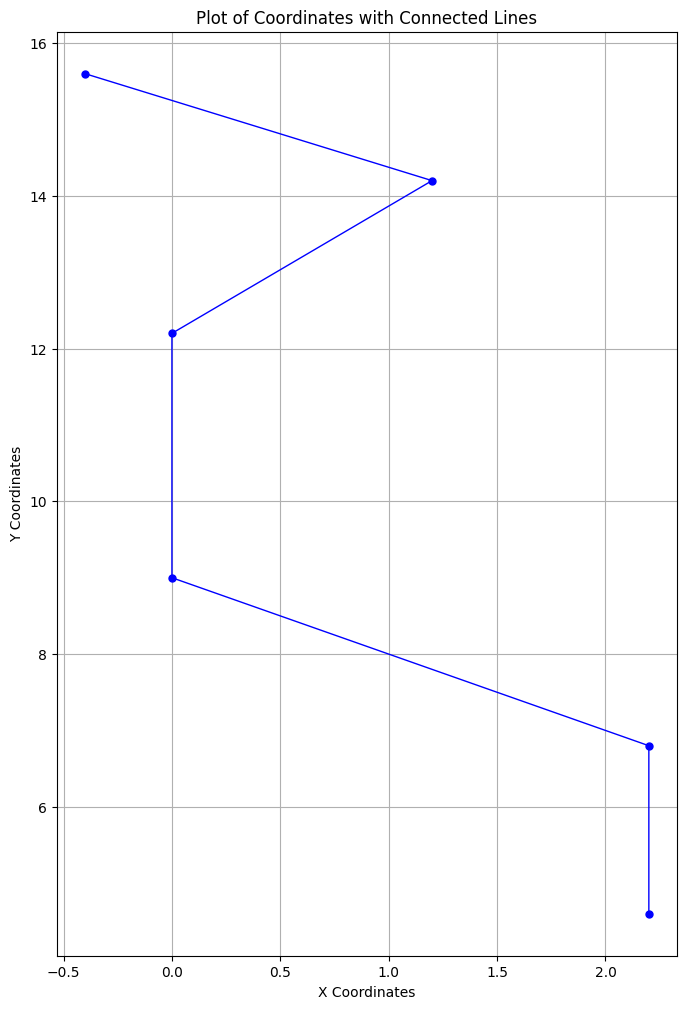

In [16]:
draw_path(final_route)